## TRABAJO PRACTICO DATA SCIENCE II CODERHOUSE

**Alumna**: Emilia Cúneo

### INTRODUCCION    
#### MOTIVACION  
La esperanza de vida es un indicador clave del desarrollo y la calidad de vida en una sociedad, ya que refleja el impacto de factores como la salud, la nutrición y el acceso a servicios médicos. Comprender que factores influyen en la longevidad de una población es fundamental para mejorar la condiciones de vida y reducir desigualdades.
En este trabajo se analizará un dataset relacionado a esta temática extraido de kaggle, donde se analizan 193 países entre los años 2000 y 2015.
Link : https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data .    
Este trabajo busca analizar e identificar patrones y correlaciones entre diversas variables para aportar información valiosa a la salud pública y formulación de politicas.  
#### AUDIENCIA  
Este proyecto está destinado principalmente a funcionarios del estado y gobiernos, que son los responsables de diseñar programas y políticas de salud pública.  A su vez, puede brindar información de utilidad para profesionales de la salud, educadores e investigadores y la población en general.


### PREGUNTAS DE INTERES  
. ¿Cuáles son los factores más influyentes en la esperanza de vida?  
. ¿Cómo varía la esperanza de via según el estatus socioeconómico del país?  
. ¿Existe una relación entre el gasto en salud y la esperanza de vida?   
. ¿Cómo se relaciona el acceso a la educación con la esperanza de vida?
. ¿Cómo se relaciona el nivel de vacunación de una sociedad con la esperanza de vida?



### IMPORTACION DE DATOS

In [103]:
#Se importan las librerias que usaremos en el trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### CARGA DE DATOS

In [104]:
# Se sube el archivo
df_LED = pd.read_csv("Life Expectancy Data.csv")

### EXPLORACION DE DATOS

In [105]:
#Primero se usa el comando head para tener un primer vistazo de la tabla y los valores
df_LED.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [106]:
#Tambien usamos el comando info para tener un primer vistazo de la información general del dataset
df_LED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [107]:
df_LED.shape

(2938, 22)

A partir de estos comandos que usamos se puede ver que el dataset tiene 22 columnas o atributos y 2938 registros o filas. También se observa que no todas las columnas tienen la cantidad total de registros no nulos,es decir que existen valores faltantes. Por lo tanto hay que ver como tratar a estos valores.   
Por otro lado, al ver los primeros registros y las columnas de este dataset, se describe a que se refiere cada columna:  
. **Country**: Nombre del país  
. **Year**: Año de registro de los datos  
. **Status**: Pais en desarrollo o desarrollado   
. **Life Expectancy**: Esperanza de vida al nacer en años  
. **Adult Mortality**: Tasa de mortalidad en adultos por cada 1000 habitantes entre los 15 y 60 años    
. **Infant Deaths**: Número de muertes infantiles por cada 1000 nacimientos  
. **Alcohol**: Consumo de alcohol promedio per cápita    
. **Percentage Expenditure**: Gasto en salud pública como porcentaje del PBI per capita  
. **Hepatitis B**: Porcentaje de niños vacunados
. **Measles**: Número de casos de sarampión reportados por año(x1000)  
. **BMI**: Índice de masa corporal promedio de la población  
. **Under five deaths**: Número de muertes en niños menores de 5 años por cada 1000 nacimientos  
. **Polio**: Porcentaje de niños vacunados contra la poliomielitis    
. **Total expenditure**: Gasto en salud como porcentaje total del gasto gubernamental total  
. **Diphteria**: Porcentaje de niños vacunados contra la difteria    
. **HIV**: Muertes por cada 1000 nacidos 
. **GDP**: Producto Bruto Interno per cápita   
. **Population**: Población total del país  
. **Thinnes 1-19 years**: Porcentaje de delgadez en la población de 1 a 19 años  
. **Thinnes 5-9 years**: Porcentaje de delgadez en la población de 5 a 9 años     
. **Income composition of resources**: Índice de desarrollo basado en ingresos y recursos  
. **Schooling**: Promedio de años de educación por persona  

Por último, se pueden ver los tipos de datos que tiene el dataset: Se observan datos de tipo entero, float y object(string).  


In [108]:
# Usamos describe y ponemos include all para que inicluya también a las variables categóricas, no solo a las 
# numéricas
df_LED.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Afghanistan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938.0,NaN,NaN,NaN,2007.51872,4.613841,2000.0,2004.0,2008.0,2012.0,2015.0
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928.0,NaN,NaN,NaN,69.224932,9.523867,36.3,63.1,72.1,75.7,89.0
Adult Mortality,2928.0,NaN,NaN,NaN,164.796448,124.292079,1.0,74.0,144.0,228.0,723.0
infant deaths,2938.0,NaN,NaN,NaN,30.303948,117.926501,0.0,0.0,3.0,22.0,1800.0
Alcohol,2744.0,NaN,NaN,NaN,4.602861,4.052413,0.01,0.8775,3.755,7.7025,17.87
percentage expenditure,2938.0,NaN,NaN,NaN,738.251295,1987.914858,0.0,4.685343,64.912906,441.534144,19479.91161
Hepatitis B,2385.0,NaN,NaN,NaN,80.940461,25.070016,1.0,77.0,92.0,97.0,99.0
Measles,2938.0,NaN,NaN,NaN,2419.59224,11467.272489,0.0,0.0,17.0,360.25,212183.0


Con esta información se puede ver un resumen estadístico de las columnas del data frame. Por ejemplo, se puede ver con el valor count el número de valores no nulos. Para las variables numéricas, se encuentra la media, la desviación estandar, valores mínimos y máximos, la mediana y  los diferentes cuartiles. Para variables categóricas se pueden ver el número de valores no nulos, como se mencionó anteriormente, también la cantidad de valores únicos, el valor más frecuente y su frecuencia.

In [109]:
df_LED.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### TRATAMIENTO DE DATOS NULOS

In [110]:
# Se detectan y trabaja con los datos nulos. Para eso se usa una funcion que arma una tabla con las variables con 
# datos faltantes y cantidades y tambien con sus porcentajes para ver que tan representativos son
def get_tabla_valores_faltantes(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis = 1)
    mis_val_table_columns = mis_val_table.rename(columns = {0: 'VALORES FALTANTES', 1: '% DEL TOTAL DE VALORES'})
    mis_val_table_columns = mis_val_table_columns[mis_val_table_columns.iloc[:,1] != 0]
    mis_val_table_columns = mis_val_table_columns.sort_values('% DEL TOTAL DE VALORES', ascending = False).round(1)
    print('El data frame tiene ' + str(df.shape[1]) + ' columnas.\n' 'Hay ' + str(mis_val_table_columns.shape[0]) + 
          ' columnas con valores faltantes')
    return mis_val_table_columns
    

In [111]:
# Se pasa como argumento de la funcion el data frame que estamos usando
get_tabla_valores_faltantes(df_LED)

El data frame tiene 22 columnas.
Hay 14 columnas con valores faltantes


,VALORES FALTANTES,% DEL TOTAL DE VALORES
Population,652,22.2
Hepatitis B,553,18.8
GDP,448,15.2
Total expenditure,226,7.7
Alcohol,194,6.6
Income composition of resources,167,5.7
Schooling,163,5.5
BMI,34,1.2
thinness 1-19 years,34,1.2
thinness 5-9 years,34,1.2


Se puede ver que hay un número considerable de variables con datos faltantes, y algunas representan cerca del 20 % de los datos. No vamos a eliminar ninguna columna porque son importantes para el análisis.Por esto, se imputarán los nulos para poder trabajar siguiendo distintos criterios según el caso.  
. Para el caso de la variable **Population** se podría recurrir a fuentes externas para rellenar los valores, teniendo en cuenta que es información que puede ser accesible. En este caso, como es un trabajo de clase y teniendo en cuenta el tiempo que llevaría buscar cada valor, se realizará una imputación con interpolación para cada país.  
. Para el caso de la variable **Hepatitis B** se realizará una imputación con la mediana por status, es decir dependiendo de si el pais esta en desarrollo o no, teniendo en cuenta que puede variar mucho el valor dependiendo de esto para el estado de vacunación.  
. Para el caso de la variable **GDP** se realizará una imputación con interpolación para cada país.  
. Para la variable **Total expenditure** se realizará una imputación con interpolación por cada país.  
. Para la variable **Alcohol** se realizará una imputación con la mediana por cada país.  
. Para la variable **Income composition of resources** se realizará una imputación con interpolación por cada país.  
. Para la variable **Schooling** se realizará una imputación con interpolación por cada país.  
. Para la variable **BMI** se realizará una imputación con la mediana por status.  
. Para las variables **Thinness** se realizará una imputación con la mediana por status.  
. Para la variable **Polio** se realizará una imputación con la mediana por cada status.  
. Para la variable **Diphtheria** se realizará una imputación con la mediana por status.  
. Para la variable **Life Expectancy** se realizará una imputación con interpolación por país.  
. Para la variable **Adult Mortality** se realizará una imputación con interpolación por país.  


In [116]:
# Imputación de variables
#Population
df_LED['Population'] = df_LED.groupby('Country', group_keys = False)['Population'].apply(lambda x: x.interpolate())
df_LED['Population'] = df_LED['Population'].fillna(method='bfill').fillna(method = 'ffill')  
#Hepatitis B
df_LED['Hepatitis B'] = df_LED.groupby('Status')['Hepatitis B'].transform(lambda x: x.fillna(x.median()))  
#GDP
df_LED['GDP'] = df_LED.groupby('Country', group_keys = False)['GDP'].apply(lambda x: x.interpolate())
df_LED['GDP'] = df_LED['GDP'].fillna(method='bfill').fillna(method = 'ffill')  
#Total expenditure
df_LED['Total expenditure'] = df_LED.groupby('Country', group_keys = False)['Total expenditure'].apply(lambda x: x.interpolate())
df_LED['Total expenditure'] = df_LED['Total expenditure'].fillna(method='bfill').fillna(method = 'ffill')  
#Alcohol
df_LED['Alcohol'] = df_LED.groupby('Status')['Alcohol'].transform(lambda x: x.fillna(x.median()))  
#Income composition
df_LED['Income composition of resources'] = df_LED.groupby('Country', group_keys = False)['Income composition of resources'].apply(lambda x: x.interpolate())
df_LED['Income composition of resources'] = df_LED['Income composition of resources'].fillna(method='bfill').fillna(method = 'ffill') 
#Schooling
df_LED['Schooling'] = df_LED.groupby('Country', group_keys = False)['Schooling'].apply(lambda x: x.interpolate())
df_LED['Schooling'] = df_LED['Schooling'].fillna(method='bfill').fillna(method = 'ffill') 
#BMI
df_LED[' BMI '] = df_LED.groupby('Status')[' BMI '].transform(lambda x: x.fillna(x.median()))
#Thiness
df_LED[' thinness  1-19 years'] = df_LED.groupby('Status')[' thinness  1-19 years'].transform(lambda x: x.fillna(x.median()))
df_LED[' thinness 5-9 years'] = df_LED.groupby('Status')[' thinness 5-9 years'].transform(lambda x: x.fillna(x.median()))
#Polio
df_LED['Polio'] = df_LED.groupby('Status')['Polio'].transform(lambda x: x.fillna(x.median()))
#Diphtheria
df_LED['Diphtheria '] = df_LED.groupby('Status')['Diphtheria '].transform(lambda x: x.fillna(x.median()))
#Life Expectancy
df_LED['Life expectancy '] = df_LED.groupby('Country', group_keys = False)['Life expectancy '].apply(lambda x: x.interpolate())
df_LED['Life expectancy '] = df_LED['Life expectancy '].fillna(method='bfill').fillna(method = 'ffill') 
#Adult Mortality
df_LED['Adult Mortality'] = df_LED.groupby('Country', group_keys = False)['Adult Mortality'].apply(lambda x: x.interpolate())
df_LED['Adult Mortality'] = df_LED['Adult Mortality'].fillna(method='bfill').fillna(method = 'ffill') 


In [117]:
# Se corrobora que no haya datos faltantes
get_tabla_valores_faltantes(df_LED)

El data frame tiene 22 columnas.
Hay 0 columnas con valores faltantes


,VALORES FALTANTES,% DEL TOTAL DE VALORES


In [118]:
#Corroboramos que no haya datos duplicados
df_LED.duplicated().sum()

0

## VISUALIZACION DE DATOS  
Se mostrarán algunos gráficos a continuación con el fin de hacer un análisis de los datos del data frame

<Axes: >

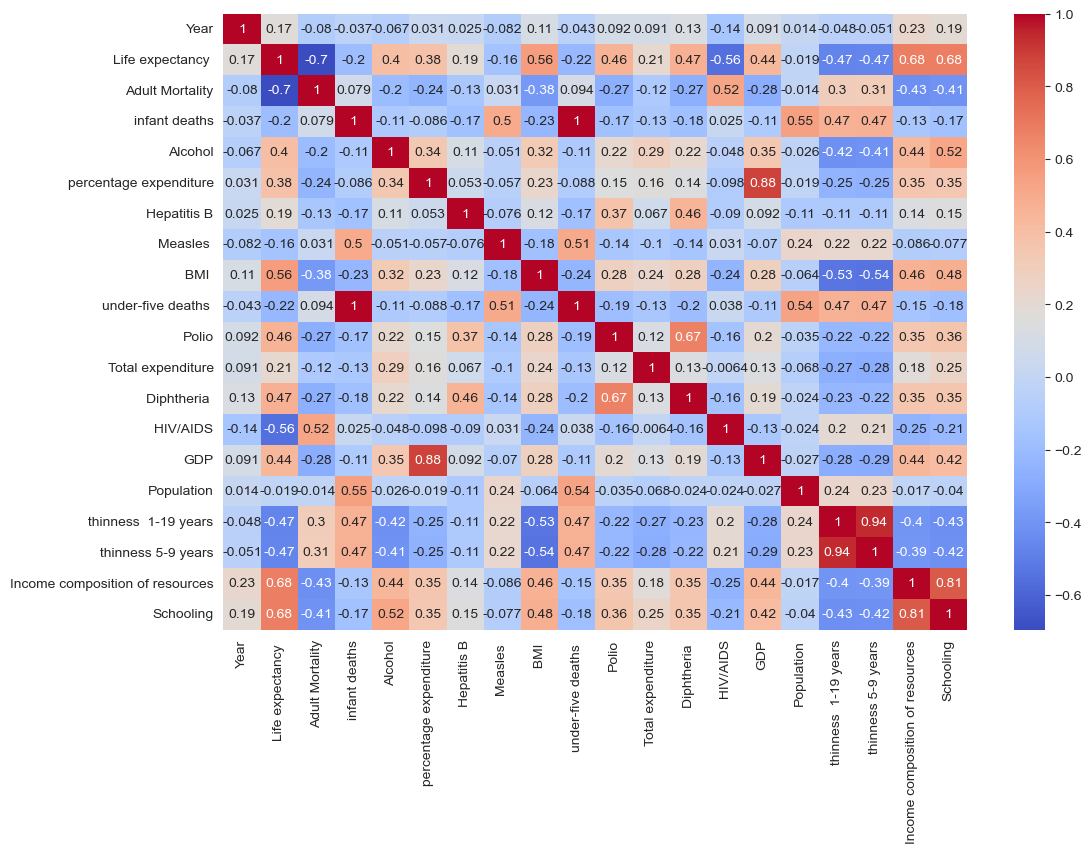

In [120]:
#Heatmap de las variables numericas en seaborn
plt.figure(figsize = (12,8))
df_numerico = df_LED.select_dtypes(include= ['float64', 'int64'])
corr = df_numerico.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

En este gráfico se puede ver la correlación entre las variables numéricas. Los valores cercanos a uno indican una correlación positiva, es decir que cuando aumenta, la otra también.
Los valores cercanos a -1 indican una correlación negativa, es decir que cuando una variable aumenta, la otra disminuye. Por ejemplo, se puede visualizar una correlación positiva entre Esperanza de vida y el nivel de ingresos y la educación (0.7), tambien el nivel de ingresos y la educación. Y en correlación negativa por ejemplo, se puede ver la esperanza de vida y la desnutrición, o también la desnutrición relacionad con el BMI.

<function matplotlib.pyplot.show(close=None, block=None)>

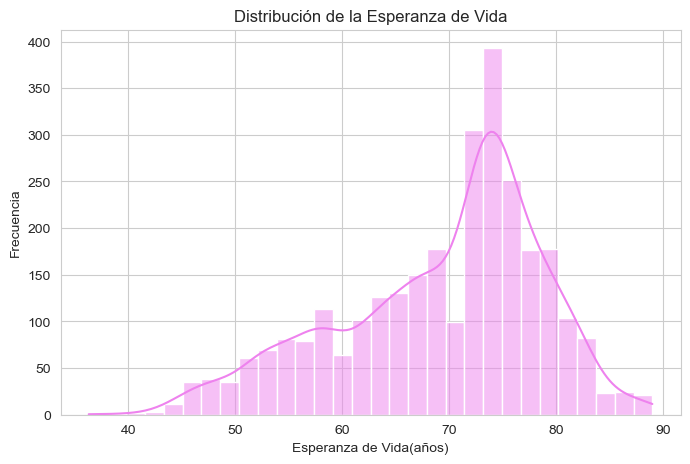

In [133]:
# Distribución Esperanza de Vida- Histograma

plt.figure(figsize=(8,5))
sns.histplot(df_LED['Life expectancy '], kde=True, bins = 30, color = 'violet')
plt.title('Distribución de la Esperanza de Vida')
plt.xlabel('Esperanza de Vida(años)')
plt.ylabel('Frecuencia')
plt.show

Este gráfico permite ver la distribución de la variable Esperanza de vida. Se puede ver en el gráfico que hay más paises con esperanzas de vida más altos que bajos por como está distribuido, pero también se ven valores bastante bajos que hace falta analizar. Los valores bajos podrían darse en paises donde haya conflictos bélicos, pobreza o sistemas de salud deficientes, mientras que en los valores altos representa a paises con alta calidad de vida y sistemas de salud avanzados. También podemos ver que la moda, el  valor más común se da entre los 70 y 80 años de edad.

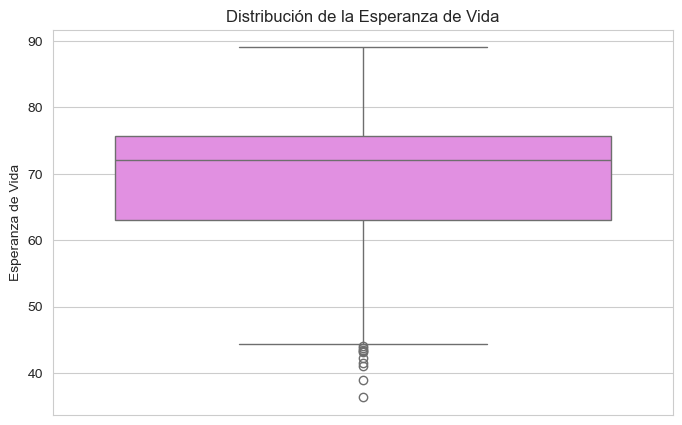

In [158]:
# Esperanza de Vida - Boxplot

plt.figure(figsize =(8,5))
sns.boxplot(y = df_LED['Life expectancy '], color = 'violet')
plt.title('Distribución de la Esperanza de Vida')
plt.ylabel('Esperanza de Vida')
plt.show()

El boxplot muestra la distribución de la espereanza de vida también, al igual que el histograma que se analizó anteriormente. Podemos ver outliers analizando y vemos que la forma es parecida a la distribución que ya vimos. Donde la mediana está entre los 70 y 80, mostrando la mayor concentración de valores entre 62 Y 76 aproximadamente.
Los outliers no se deben a ningun error en el dataset, ni hay que dejarlos de lado para hacer el análisis, estos podrían corresponder a paises afectadas por conflictos, pobreza extrema o problemas de salud púbica, como dijimos anteriormente. Esto requiere un análisis más profundo para ver que casos son y por qué se da exactamente.

<function matplotlib.pyplot.show(close=None, block=None)>

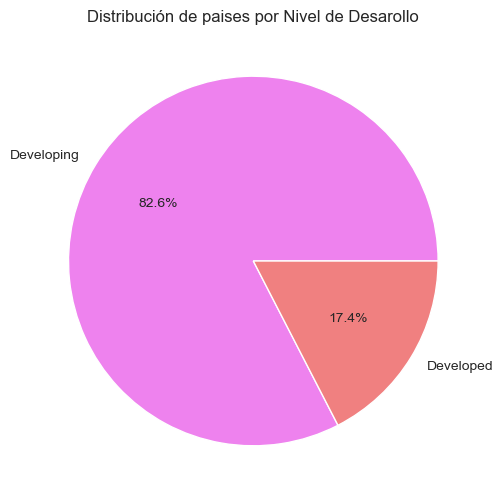

In [157]:
# Nivel de desarrollo de paises - Gráfico de torta
plt.figure(figsize =(6,6))
df_LED['Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['violet','lightcoral'])
plt.title('Distribución de paises por Nivel de Desarollo')
plt.ylabel('')
plt.show

En este gráfico se puede observar que el 80 % de los datos del dataset son de paises en vía de desarrollo y el resto de paises desarrollados.

<function matplotlib.pyplot.show(close=None, block=None)>

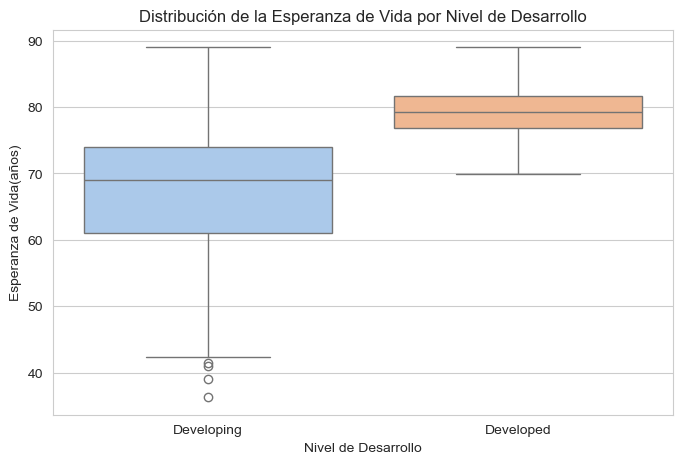

In [136]:
# Esperanza de vida según Status -  Boxplot
plt. figure(figsize =(8,5))
sns.boxplot(data = df_LED, x = 'Status', y = 'Life expectancy ', palette = 'pastel')
plt.title('Distribución de la Esperanza de Vida por Nivel de Desarrollo')
plt.xlabel('Nivel de Desarrollo')
plt.ylabel('Esperanza de Vida(años)')
plt.show

Este gráfico muestra claramente una diferencia entre paises en desarrollo y paises desarrollados. Se puede ver que la mediana en los paises desarrollados se encuentra cerca de los 80,
mientras que en el otro gráfico se encuentra por debajo de los 70 años.  A su vez, se ve una mayor variabilidad en los paises en via de desarrollo, y también presencia de outliers,
por debajo de los 50 y 40 años. Esto puede darse por ser paises con graves problemas de salud, pobreza o conflicto económicos, bélicos o de alguna índole.
Esto confirma que los paises con mejor desarrollo económico y social tienden a tener mayor longevidad.


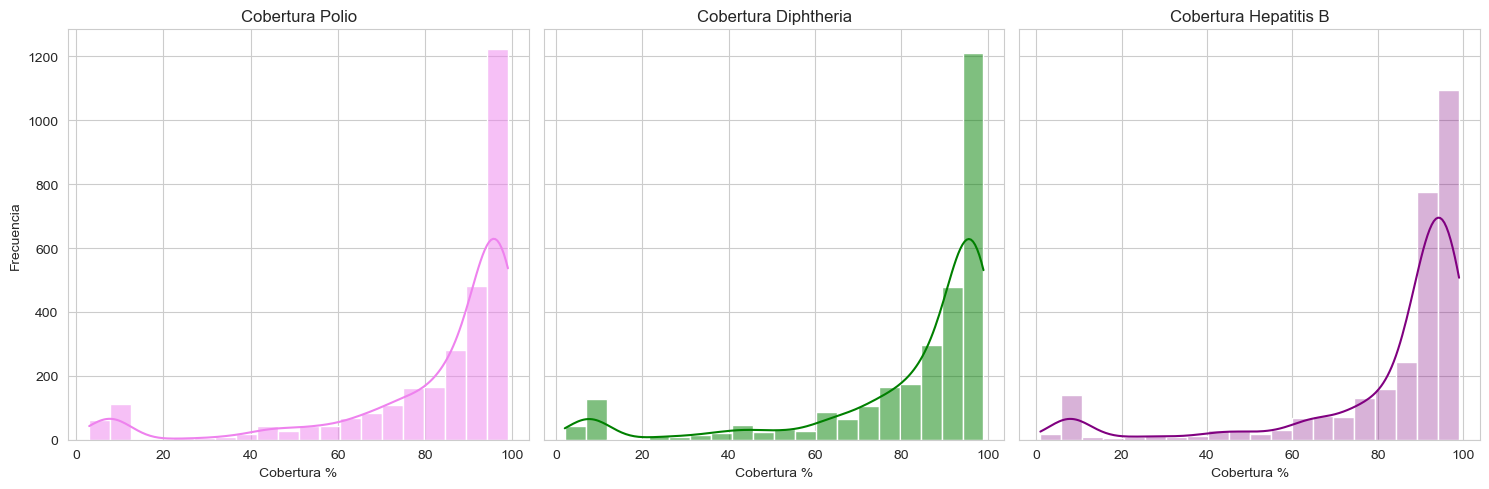

In [141]:
# Cobertura de vacunas - Histogramas

# Polio
fig,axes = plt.subplots(1,3, figsize =(15,5), sharey = True)
sns.histplot(df_LED['Polio'], kde = True, bins = 20, color = 'violet', ax = axes[0], alpha = 0.5)
axes[0].set_title('Cobertura Polio')
axes[0].set_xlabel('Cobertura %')
axes[0].set_ylabel('Frecuencia')

# Diphtheria
sns.histplot(df_LED['Diphtheria '], kde = True, bins = 20, color = 'green', ax = axes[1], alpha = 0.5)
axes[1].set_title('Cobertura Diphtheria')
axes[1].set_xlabel('Cobertura %')

# Hepatitis B
sns.histplot(df_LED['Hepatitis B'], kde = True, bins = 20, color = 'purple', ax = axes[2], alpha = 0.3)
axes[2].set_title('Cobertura Hepatitis B')
axes[2].set_xlabel('Cobertura %')

plt.tight_layout()
plt.show()

En este grafico se puede ver que hay patrones similares entre las tres coverturas, la curva sigue un patron mut parecido. También podemos apreciar que la mayoría de los paises tienen
una cobertura de vacunación muy alta, con un gran número de casos cercanos a 90 y 100 %. Esto indica que hay muchos paises que presentan campañas de vacunación sumamente exitosas. Por otro lado, hay una cantidad pequeña, pero preocupante de paises, entre el 0 y 20 % de vacunación. Esto puede deberse, como vimos anteriormente, a paises con problemas de acceso a la salud, conflictos o pobreza extrema.

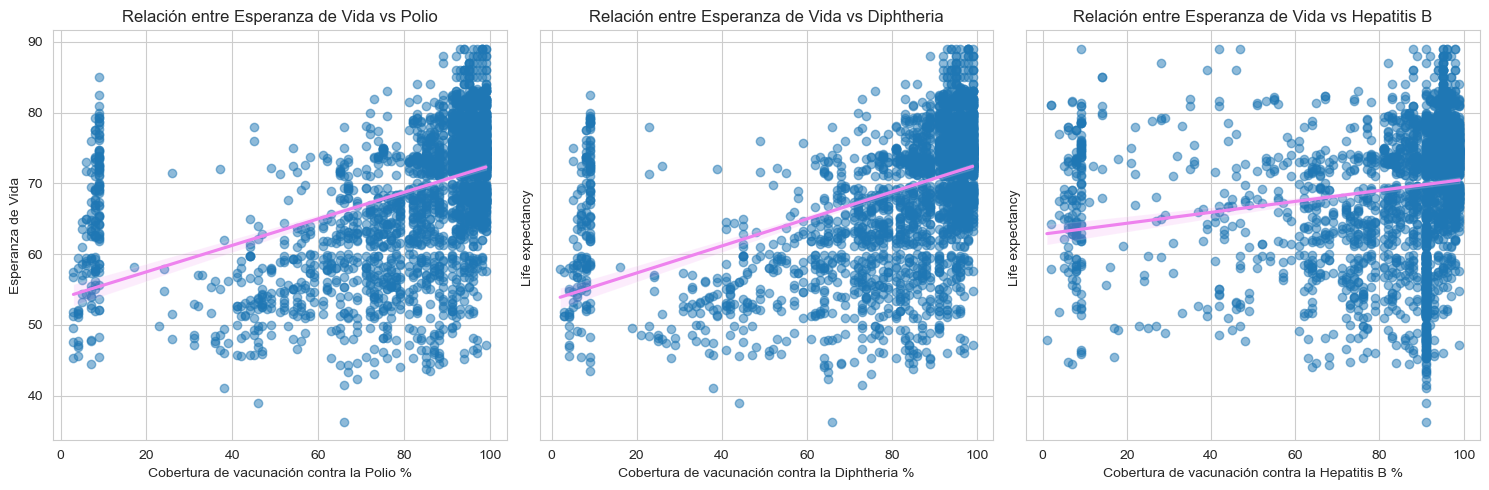

In [149]:
# Relaión entre Esperanza de Vida y Vacunación - Scatterplot

fig,axes = plt.subplots(1,3, figsize =(15,5), sharey = True)

# Scatterplot para Polio
sns.regplot(x = df_LED['Polio'], y = df_LED['Life expectancy '], scatter_kws = {'alpha':0.5}, line_kws ={'color': 'violet'}, ax =axes[0])
axes[0].set_title('Relación entre Esperanza de Vida vs Polio')
axes[0].set_xlabel('Cobertura de vacunación contra la Polio %')
axes[0].set_ylabel('Esperanza de Vida')

# Scatterplot para Diphtheria
sns.regplot(x = df_LED['Diphtheria '], y = df_LED['Life expectancy '], scatter_kws = {'alpha':0.5}, line_kws ={'color': 'violet'}, ax =axes[1])
axes[1].set_title('Relación entre Esperanza de Vida vs Diphtheria')
axes[1].set_xlabel('Cobertura de vacunación contra la Diphtheria %')

# Scatterplot para Hepatitis B
sns.regplot(x = df_LED['Hepatitis B'], y = df_LED['Life expectancy '], scatter_kws = {'alpha':0.5}, line_kws ={'color': 'violet'}, ax =axes[2])
axes[2].set_title('Relación entre Esperanza de Vida vs Hepatitis B')
axes[2].set_xlabel('Cobertura de vacunación contra la Hepatitis B %')

plt.tight_layout()
plt.show()

En estos gráfico se puede ver en linea general como la tendencia es creciente a medida que hay mayor nivel de vacunación la expectativa de vida crece.

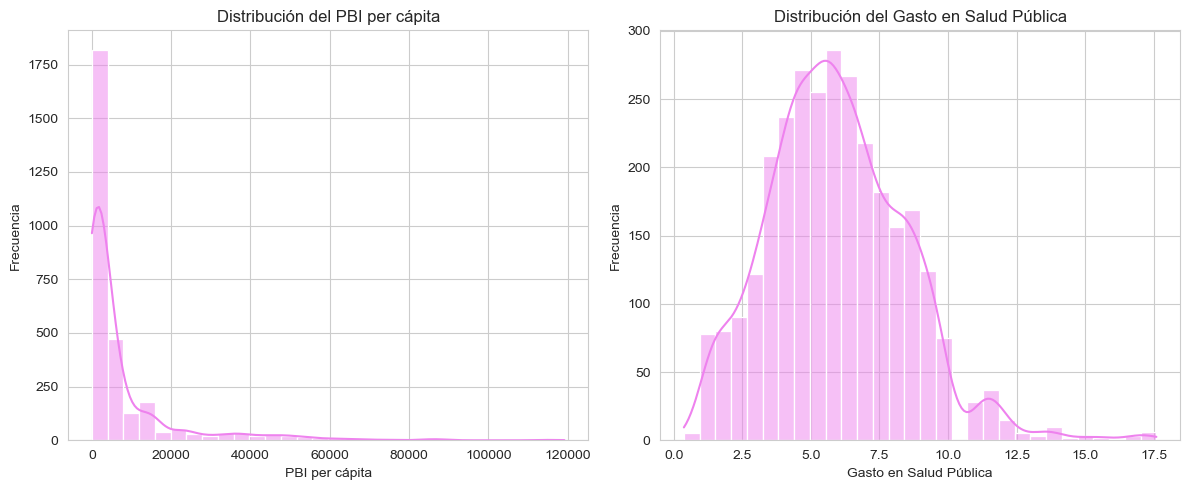

In [175]:
# Distribución del Gasto Pública y PBI- Histograma

plt.figure(figsize=(12,5))

# PBI per cápita
plt.subplot(1,2,1)
sns.histplot(df_LED['GDP'], kde=True, bins = 30, color = 'violet')
plt.title('Distribución del PBI per cápita')
plt.xlabel('PBI per cápita')
plt.ylabel('Frecuencia')

# Salud Pública
plt.subplot(1,2,2)
sns.histplot(df_LED['Total expenditure'], kde=True, bins = 30, color = 'violet')
plt.title('Distribución del Gasto en Salud Pública')
plt.xlabel('Gasto en Salud Pública')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En el gráfico de distribucón del PBI per cápita se puede ver que la mayoría de los paises tienen un PBI bajo. Existe una larga cola hacia la derecha, lo que indica que hay pocos paises con un PBI per cápita extremadamente alto. Esto sugiere una gran desigualdad económica entre los paises que se analizan en este dataset, donde unos pocos tienen economías fuertes, a diferencia del resto. 
En el gráfico de distribución del Gasto en Salud Pública se observa una concentración en valores bajos y medios. Hay una leve cola hacia la derecha, como en el gráfico anterior, lo que indica que algunos países invierten mucho más en salud pública.

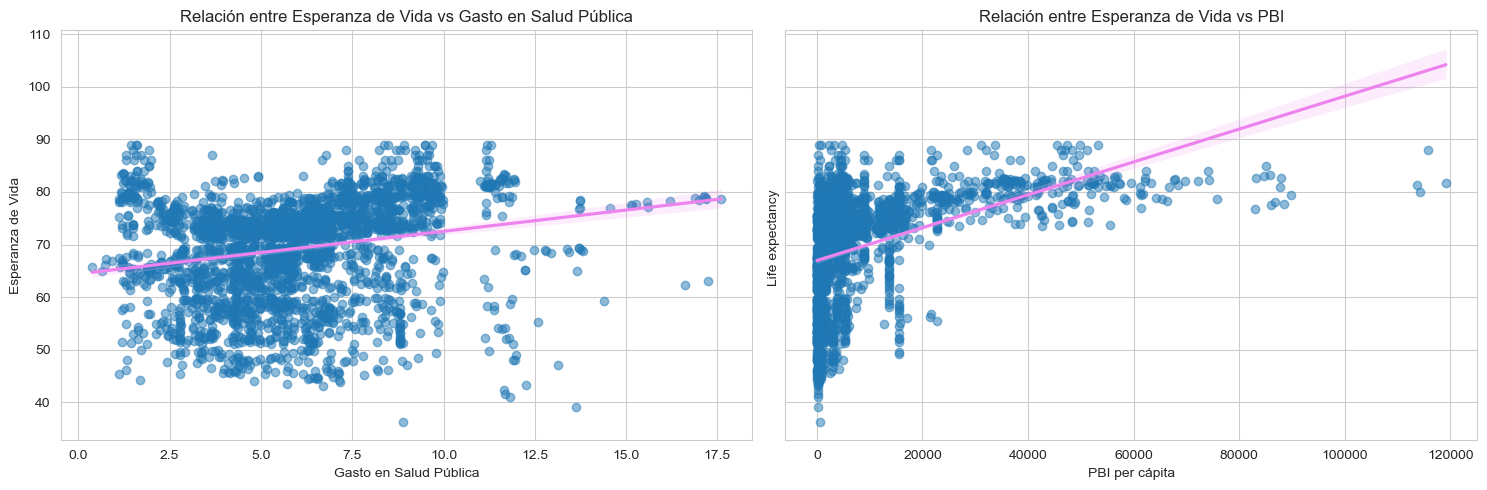

In [152]:

# Relación entre la Esperanza de Vida y el gasto en salud Pública -Scatter Plot

fig,axes = plt.subplots(1,2, figsize =(15,5), sharey = True)

# Scatterplot para Total Expenditure
sns.regplot(x = df_LED['Total expenditure'], y = df_LED['Life expectancy '], scatter_kws = {'alpha':0.5}, line_kws ={'color': 'violet'}, ax =axes[0])
axes[0].set_title('Relación entre Esperanza de Vida vs Gasto en Salud Pública')
axes[0].set_xlabel('Gasto en Salud Pública')
axes[0].set_ylabel('Esperanza de Vida')

# Scatterplot para GDP
sns.regplot(x = df_LED['GDP'], y = df_LED['Life expectancy '], scatter_kws = {'alpha':0.5}, line_kws ={'color': 'violet'}, ax =axes[1])
axes[1].set_title('Relación entre Esperanza de Vida vs PBI')
axes[1].set_xlabel('PBI per cápita')

plt.tight_layout()
plt.show()


Los gráficos muestran que hay una tendencia positiva entre el gasto de salud pública y la esperanza de vida, pero con una dispersión considerable. Esto indica que en general, a mayor gasto en salud pública, la esperanza de vida tiende a ser más alta, aunque hay algunas variaciones.
En comparación con el PBI per cápita, parece haber una correlación más fuerte, los paises con mayores PBI tienden a tener una mayor esperanza de vida. Esto indica que la riqueza de un país también juega un papel importante en la longevidad de su población.

Otro análisis a realizar a partir de estos resultados, es que países son los que tienen esperanzas de vida más altos y más bajos:

In [162]:
# Paises con Esperanza de Vida más bajos
df_latest = df_LED.sort_values(by =['Country', 'Year'], ascending =[True,False]).drop_duplicates(subset=['Country'])
low_life_expectancy = df_latest[['Country','Life expectancy ']].sort_values(by='Life expectancy ', ascending = True)
print(low_life_expectancy.head(5))


                       Country  Life expectancy 
2297              Sierra Leone              51.0
48                      Angola              52.4
512   Central African Republic              52.5
528                       Chad              53.1
432              Côte d'Ivoire              53.3


In [163]:
# Paises con Esperanza de Vida más altos
df_latest = df_LED.sort_values(by =['Country', 'Year'], ascending =[True,False]).drop_duplicates(subset=['Country'])
high_life_expectancy = df_latest[['Country','Life expectancy ']].sort_values(by='Life expectancy ', ascending = False)
print(high_life_expectancy.head(5))

       Country  Life expectancy 
2345  Slovenia              88.0
737    Denmark              86.0
673     Cyprus              85.0
544      Chile              85.0
1314     Japan              83.7


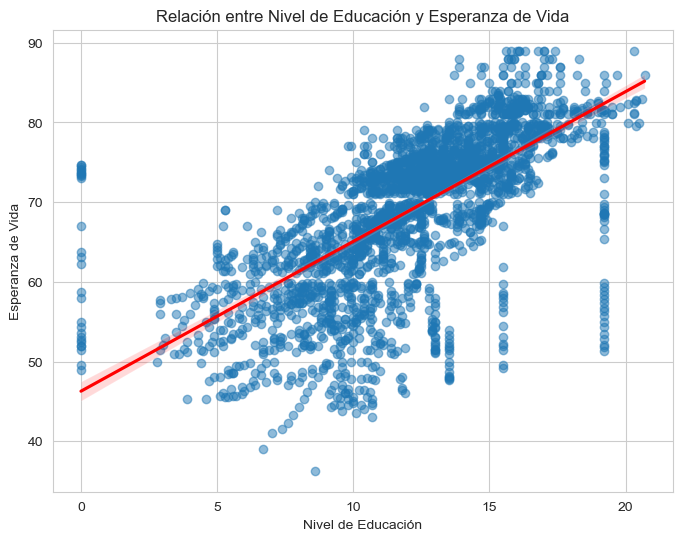

In [174]:
# Esperanza de Vida y Nivel de Educación - Scatterplot
plt.figure(figsize=(8,6))
sns.regplot(data=df_LED, x = 'Schooling',y = 'Life expectancy ', scatter_kws ={'alpha': 0.5}, line_kws={'color':'red'})
plt.title('Relación entre Nivel de Educación y Esperanza de Vida')
plt.xlabel('Nivel de Educación')
plt.ylabel('Esperanza de Vida')
plt.show()

En este gráfico podemos ver una tendencia positiva. Es decir que la esperanza de vida aumenta a medida que aumenta el nivel de educación. Esto puede relacionarse con el nivel de desarrollo del país también, como ya vimos anteriormente. A mayor desarrollo mejor educación también.